# Khám phá dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPRegressor
from sklearn import set_config
set_config(display = 'diagram') # Để trực quan hóa pipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
raw_used_car_df = pd.read_csv('raw_data.csv', sep = '\t')
raw_used_car_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"
1,Honda,Pilot,EX FWD,2013,"80,532",3.5L V-6 Gas,Gas,3.0,"11,694"
2,Honda,CR-V,LX FWD,2013,"79,796",2.4L Inline-4 Gas,Gas,1.0,"13,590"
3,Honda,Civic,LX Sedan Automatic,2013,"76,882",1.8L Inline-4 Gas,Gas,1.0,"7,986"
4,Honda,Civic,LX Sedan Automatic,2013,"113,673",1.8L Inline-4 Gas,Gas,1.0,"6,990"


## Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [3]:
raw_used_car_df.shape

(4800, 9)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin cơ bản về 1 chiếc xe

Các dòng có ý nghĩa là giống nhau

## Dữ liệu có các dòng bị lặp không?

In [4]:
raw_used_car_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4795    False
4796    False
4797    False
4798    False
4799    False
Length: 4800, dtype: bool

In [5]:
# Bao nhiêu dòng bị lặp?
num_row_dup = raw_used_car_df.duplicated().sum()
num_row_dup

148

In [6]:
# Dòng nào bị lặp?
duplicated_rows = raw_used_car_df[raw_used_car_df.duplicated()]
duplicated_rows

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
394,Honda,Pilot,EX-L AWD,2016,"124,363",3.5L V-6 Gas,Gas,1.0,"17,792"
395,Honda,Civic,EX Sedan CVT,2016,"79,118",2.0L Inline-4 Gas,Gas,2.0,"13,000"
396,Honda,Civic,LX Sedan CVT,2016,"53,433",2.0L Inline-4 Gas,Gas,1.0,"10,970"
397,Honda,Accord,EX-L V6 Sedan Automatic,2016,"98,855",3.5L V-6 Gas,Gas,1.0,"12,995"
...,...,...,...,...,...,...,...,...,...
4233,Mazda,Mazda3,i Touring 4-Door Automatic,2015,"161,366",2.0L Inline-4 Gas,Gas,1.0,"6,990"
4234,Mazda,CX-5,Grand Touring AWD Automatic,2015,"81,477",2.5L Inline-4 Gas,Gas,1.0,"14,995"
4288,Mazda,CX-5,Grand Touring AWD Automatic,2015,"95,609",2.5L Inline-4 Gas,Gas,1.0,"12,955"
4658,Mazda,Mazda6,Touring Automatic,2019,"29,144",2.5L Inline-4 Gas,Gas,1.0,"19,200"


In [7]:
group_cars = raw_used_car_df.groupby(['make', 'model', 'body style', 'year'])

In [8]:
# Kiểm tra thử dòng 393 xem có đúng là dòng 393 bị lặp không?
# --> đúng, ta thấy dòng 393 bị lặp lại dòng 363 trong bảng dưới
group_cars.get_group(('Honda', 'Accord', 'EX-L Sedan I4 CVT', 2016))

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
332,Honda,Accord,EX-L Sedan I4 CVT,2016,"195,707",2.4L Inline-4 Gas,Gas,1.0,"10,912"
346,Honda,Accord,EX-L Sedan I4 CVT,2016,"35,471",2.4L Inline-4 Gas,Gas,1.0,"15,793"
363,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
378,Honda,Accord,EX-L Sedan I4 CVT,2016,"94,394",2.4L Inline-4 Gas,Gas,1.0,"11,900"
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"


In [9]:
# Bỏ đi các dòng bị lặp, gán vào dataframe mới
used_car_df = raw_used_car_df.drop_duplicates()

In [10]:
used_car_df.shape

(4652, 9)

In [11]:
# Kiểm tra lại dataframe mới có còn dòng nào bị lặp không?
num_dup = used_car_df.duplicated().sum()
num_dup

0

In [12]:
# Test
assert num_dup == 0
assert used_car_df.shape == (raw_used_car_df.shape[0] - num_row_dup, raw_used_car_df.shape[1])

## Mỗi cột có ý nghĩa gì?

In [13]:
used_car_df.head(1)

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"


* <b>Cột "make"</b>:             tên hãng xe
* <b>Cột "model"</b>:            tên dòng xe
* <b>Cột "body style"</b>:       dáng xe (kết cấu thân xe)
* <b>Cột "year"</b>:             năm sản xuất chiếc xe
* <b>Cột "mileage"</b>:          tổng số dặm xe đã đi
* <b>Cột "engine"</b>:           thông số động cơ xe
* <b>Cột "fuel type"</b>:        xe đi loại nhiên liệu gì?
* <b>Cột "number of owners"</b>: xe đã qua tay bao nhiêu đời chủ rồi?
* <b>Cột "price"</b>:            giá thành xe hiện được bán

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?

In [14]:
dtypes = used_car_df.dtypes
dtypes

make                 object
model                object
body style           object
year                  int64
mileage              object
engine               object
fuel type            object
number of owners    float64
price                object
dtype: object

Trong Pandas, kiểu dữ liệu "object" thường ám chỉ chuỗi. Tuy nhiên, "object" có thể ám chỉ một kiểu dữ liệu bất kỳ. "object" giống như con trỏ, có thể trỏ tới một đối tượng bất kỳ

Để biết chính xác kiểu dữ liệu đang được lưu, tiến hành lấy giá trị từng cột để xem

In [15]:
print('make:', type(used_car_df.loc[0, 'make']))
print('model:', type(used_car_df.loc[0, 'model']))
print('body style:', type(used_car_df.loc[0, 'body style']))
print('mileage:', type(used_car_df.loc[0, 'mileage']))
print('engine:', type(used_car_df.loc[0, 'engine']))
print('fuel type:', type(used_car_df.loc[0, 'fuel type']))
print('price:', type(used_car_df.loc[0, 'price']))

make: <class 'str'>
model: <class 'str'>
body style: <class 'str'>
mileage: <class 'str'>
engine: <class 'str'>
fuel type: <class 'str'>
price: <class 'str'>


#### Một vài đánh giá về giá trị cột để tiền xử lý kiểu dữ liệu của cột

* <b>Cột "mileage"</b>, <b>"price"</b>: ta cần dữ liệu dạng số thực, mà ở đây đang ở dạng chuỗi --> tiến hành tiền xử lý để đưa từ kiểu chuỗi sang số thực

# Tiền xử lý

## Chuyển kiểu dữ liệu cột "mileage", "price" sang kiểu số thực

In [16]:
# bỏ dấu phẩy
used_car_df.loc[:, 'mileage'] = used_car_df.loc[:, 'mileage'].str.replace(',', '')
used_car_df.loc[:, 'price'] = used_car_df.loc[:, 'price'].str.replace(',', '')

In [17]:
# chuyển sang kiểu float
used_car_df['mileage'] = used_car_df['mileage'].astype(float)
used_car_df['price'] = used_car_df['price'].astype(float)
used_car_df

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,122986.0,3.5L V-6 Gas,Gas,2.0,12895.0
1,Honda,Pilot,EX FWD,2013,80532.0,3.5L V-6 Gas,Gas,3.0,11694.0
2,Honda,CR-V,LX FWD,2013,79796.0,2.4L Inline-4 Gas,Gas,1.0,13590.0
3,Honda,Civic,LX Sedan Automatic,2013,76882.0,1.8L Inline-4 Gas,Gas,1.0,7986.0
4,Honda,Civic,LX Sedan Automatic,2013,113673.0,1.8L Inline-4 Gas,Gas,1.0,6990.0
...,...,...,...,...,...,...,...,...,...
4795,Mazda,CX-5,Grand Touring FWD,2020,13964.0,2.5L Inline-4 Gas,Gas,1.0,23888.0
4796,Mazda,CX-5,Sport FWD,2020,3759.0,2.5L Inline-4 Gas,Gas,1.0,22498.0
4797,Mazda,CX-5,Sport FWD,2020,9916.0,2.5L Inline-4 Gas,Gas,1.0,21990.0
4798,Mazda,CX-9,Grand Touring AWD,2020,5176.0,2.5L Inline-4 Gas Turbocharged,Gas,1.0,36992.0


# Đặt câu hỏi

**Câu hỏi:** làm sao để dự đoán giá trị của một chiếc xe cũ, đã qua sử dụng dựa trên các thông số của chiếc xe đó?

Câu hỏi này giải quyết được 2 vấn đề trong thực tế:
* Cho các người chủ muốn bán xe:
    * Họ ước lượng trước được giá trị của chiếc xe mà mình muốn bán dựa trên giá thị trường hiện tại. Để khi đến bất kì nơi bán nào, họ có thể thương lượng giá cả tốt hơn
* Cho các đại lý mua bán xe cũ:
    * Biết được giá trị thị trường, để có thể thương lượng giá cả với người bán
    * Nếu đã sở hữu xe cũ --> có thể đưa ra giá trị chiếc xe để bán đi

# Khám phá dữ liệu (để biết cách tách các tập)
Để biết cách tách các tập thì ta cần khám phá thêm cột output một ít:
- Cột này đã mang giá trị số chưa? (do ta đang làm bài toán hồi quy)
- Cột này có giá trị thiếu không? Nếu có giá trị thiếu thì ta sẽ xử lý rồi mới tách các tập 

In [18]:
used_car_df['price'].dtype

dtype('float64')

In [19]:
#Cột output có giá trị thiếu không?
used_car_df['price'].isna().sum()

5

In [20]:
#Xử lý cột output bằng cách loại bỏ các dòng mà thiếu giá trị price
used_car_df = used_car_df[used_car_df['price'].notna()]

In [21]:
# test xem cột price đã hết giá trị thiếu chưa
used_car_df['price'].isna().sum()

0

In [22]:
used_car_df.shape

(4647, 9)

In [23]:
#Phân bố cột output như thế nào?
used_car_df['price'].describe()

count      4647.000000
mean      17377.042608
std       10211.005659
min        2996.000000
25%       10747.500000
50%       14590.000000
75%       20899.500000
max      129982.000000
Name: price, dtype: float64

# Tiền xử lý (tách các tập)

In [24]:
# Tách X và y
used_car_y_sr = used_car_df["price"]
used_car_X_df = used_car_df.drop(columns = ['price'], axis=1)

In [25]:
# Tách tập train và tập validation, tập test theo tỉ lệ 60%:20%:20%

# Đầu tiên tách tập train 60% và tập temp 40%
train_X_df, temp_X_df, train_y_sr, temp_y_sr = train_test_split(used_car_X_df, used_car_y_sr, test_size=0.4, random_state=42)

#Tách tập temp thành 2 tập bằng nhau 50% (tức là 20%:20% như ban đầu)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(temp_X_df, temp_y_sr, test_size=0.5, random_state=42)

## Tập train

In [26]:
train_X_df.shape

(2788, 8)

In [27]:
train_y_sr.shape

(2788,)

## Tập validation

In [28]:
val_X_df.shape

(929, 8)

In [29]:
val_y_sr.shape

(929,)

## Tập test

In [30]:
test_X_df.shape

(930, 8)

In [31]:
test_y_sr.shape

(930,)

# Quay lại bước khám phá dữ liệu (Tập huấn luyện)

Sau khi đã tách ra các tập thì ta có thể thoải mái khám phá trên tập huấn luyện mà không lo sẽ làm kết quả trên tập validation và tập kiểm tra bị mất đi sự khách quan.

## Với mỗi cột có dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?  

In [32]:
train_X_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners
3835,Toyota,Corolla,L CVT,2019,36937.0,1.8L Inline-4 Gas,Gas,2.0
968,Ford,Fusion,Energi Titanium FWD,2014,54054.0,2.0L Inline-4 Plug-In Hybrid,Plug-In Hybrid,2.0
1183,Ford,F-150,XL SuperCrew 6.5' Box RWD,2016,75062.0,2.7L V-6 Gas Turbocharged,Gas,1.0
384,Honda,Fit,LX CVT,2016,24070.0,1.5L Inline-4 Gas,Gas,3.0
2822,Mercedes-Benz,E-Class,E 300 Luxury 4MATIC Sedan,2017,54635.0,2.0L Inline-4 Gas Turbocharged,Gas,1.0


In [33]:
train_X_df.dtypes[train_X_df.dtypes != object]

year                  int64
mileage             float64
number of owners    float64
dtype: object

In [34]:
train_X_df.describe()

,year,mileage,number of owners
count,2788.000000,2788.000000,2787.000000
mean,2016.507532,60744.702654,1.499103
std,2.284002,40917.086294,0.791816
min,2013.000000,5.000000,0.000000
25%,2014.000000,29219.500000,1.000000
50%,2017.000000,52173.000000,1.000000
75%,2019.000000,88003.750000,2.000000
max,2020.000000,257866.000000,6.000000


### Bảng mô tả

In [35]:
numeric_cols_df = train_X_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,year,mileage,number of owners
missing_ratio,0.0,0.00,0.035868
min,2013.0,5.00,0.000000
lower_quartile,2014.0,29219.50,1.000000
median,2017.0,52173.00,1.000000
upper_quartile,2019.0,88003.75,2.000000
max,2020.0,257866.00,6.000000


Vẽ Histogram minh họa trực quan cho giá trị của từng cột

### Biểu đồ histogram biểu thị mối liên hệ giữa: tổng số dặm và số lượng xe

Text(0, 0.5, 'Số xe')

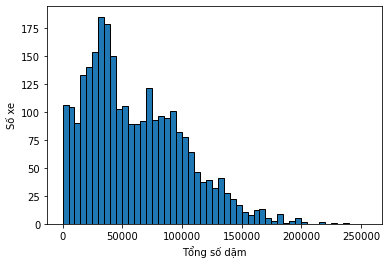

In [36]:
train_X_df['mileage'].plot.hist(bins = range(5, 260000, 5000), edgecolor = 'black')
plt.xlabel('Tổng số dặm')
plt.ylabel('Số xe')

## Với mỗi cột có kiểu dữ liệu không phải dạng số (ở đây chủ yếu ta ám chỉ dạng categorical), các giá trị được phân bố như thế nào? 

In [37]:
train_X_df.dtypes[train_X_df.dtypes == object]

make          object
model         object
body style    object
engine        object
fuel type     object
dtype: object

### Bảng mô tả

In [38]:
cate_cols_df = train_X_df.select_dtypes(include = 'object')

def value_counts(col):
    return dict(col.value_counts())

# tỉ lệ giá trị thiếu, số lượng giá trị duy nhất, thống kê giá trị duy nhất
category_stat = cate_cols_df.agg([missing_ratio, pd.Series.nunique, value_counts])
pd.set_option('display.max_colwidth', 10000)
category_stat

,make,model,body style,engine,fuel type
missing_ratio,0,0,0,0,0
nunique,6,99,619,53,7
value_counts,"{'Toyota': 487, 'Mazda': 479, 'Hyundai': 478, 'Mercedes-Benz': 470, 'Ford': 448, 'Honda': 426}","{'CX-5': 220, 'Elantra': 193, 'Civic': 152, 'Corolla': 145, 'Mazda3': 134, 'C-Class': 129, 'Camry': 119, 'Sonata': 110, 'Accord': 103, 'F-150': 103, 'CR-V': 73, 'Fusion': 72, 'E-Class': 68, 'Mazda6': 66, 'Tucson': 66, 'Super Duty F-250': 60, 'RAV4': 57, 'GLC': 55, 'Focus': 37, 'Escape': 33, 'Accent': 33, 'Prius': 33, 'GLA': 32, 'GLE': 31, 'Edge': 30, 'Tacoma': 28, 'CX-9': 27, 'Santa Fe': 26, 'Odyssey': 26, 'Pilot': 25, 'Sienna': 25, 'Santa Fe Sport': 24, 'CLA': 24, 'Transit Passenger Wagon': 24, 'HR-V': 22, 'Explorer': 22, 'Super Duty F-350': 19, 'M-Class': 17, 'Fiesta': 16, 'Highlander': 16, 'S-Class': 15, '4Runner': 14, 'GLK': 14, 'Veloster': 13, 'GL': 13, 'Tundra': 12, 'CX-3': 11, 'A-Class': 10, 'Fit': 9, 'GLS': 9, 'Avalon': 8, 'Prius c': 8, 'Mazda5': 8, 'Mustang': 8, 'SL': 8, 'Metris Passenger Van': 7, 'Metris Cargo Van': 7, 'Ridgeline': 7, 'Sprinter Cargo Van': 6, 'GLB': 6, 'MX-5 Miata': 6, 'Mazda2': 5, 'Genesis Coupe': 5, 'C-Max': 5, 'Venza': 5, 'Super Duty F-350 Chassis Cab': 4, 'Yaris': 4, 'Insight': 4, 'SLK': 3, 'Transit Cargo Van': 3, 'Genesis': 3, 'Passport': 3, 'Taurus': 3, 'Prius v': 3, 'Expedition': 3, 'Mirai': 3, 'B-Class': 3, 'G-Class': 3, 'Sprinter Passenger Van': 3, 'Yaris iA': 2, 'Transit Connect Van': 2, 'Econoline Commercial Cutaway': 2, 'Corolla iM': 2, 'Azera': 2, 'Sprinter Chassis Cabs': 2, 'CLS': 2, 'CX-30': 2, 'Kona': 2, 'Prius Prime': 1, 'SLC': 1, 'Transit Cutaway': 1, 'CR-Z': 1, 'Clarity': 1, 'C-HR': 1, '86': 1, 'AMG GT': 1, 'Ranger': 1, 'Sprinter Crew Van': 1, 'Equus': 1}","{'LE CVT': 75, 'SE FWD': 65, 'LX Sedan CVT': 59, 'Touring FWD': 43, 'C 300 Sedan RWD': 40, 'SEL 2.0L IVT': 39, 'Grand Touring FWD': 38, 'Grand Touring AWD': 33, 'SE Sedan Automatic': 33, 'XLT SuperCrew 5.5' Box 4WD': 33, 'SE I4 Automatic': 31, 'C 300 4MATIC Sedan': 28, 'Touring Automatic': 26, 'Touring AWD': 25, 'SE 2.4L': 25, 'GLC 300 SUV RWD': 25, 'GLS Sedan Automatic': 24, 'SE Sedan': 24, 'SE AWD': 24, 'i Sport 4-Door Automatic': 22, 'SEL FWD': 22, 'Sport FWD': 22, 'Limited FWD': 21, 'SEL 2.0L Sedan Automatic': 20, 'EX Sedan CVT': 20, 'E 350 4MATIC Luxury Sedan': 20, 'Two': 19, 'Grand Touring AWD Automatic': 18, 'Sport 1.5T CVT': 18, 'Sport AWD': 17, 'CLA 250 FWD': 17, 'L Automatic': 17, 'GLA 250 4MATIC': 17, 'EX AWD': 17, 'i Touring 4-Door Automatic': 17, 'E 350 Sport Sedan RWD': 17, 'C 250 Sport Sedan RWD': 16, 'EX-L AWD': 16, 'EX-L FWD': 16, 'LX Sedan I4 CVT': 16, 'SE Hatchback': 16, 'C 300 4MATIC Sport Sedan': 15, 'Touring FWD Automatic': 15, 'i Touring Automatic': 15, 'Value Edition 2.0L Sedan Automatic': 14, 'SEL 2.0L Automatic': 14, 'EX-L': 14, 'LE I4 Automatic': 14, 'SE Automatic': 14, 'GLA 250 FWD': 14, 'GLE 350 SUV RWD': 14, 'SE CVT': 14, 'Standard Roof 126"" Wheelbase': 14, 'LX Sedan Automatic': 14, 'Touring AWD Automatic': 13, 'GLC 300 RWD': 13, 'XLE AWD': 13, 'i Touring 5-Door Automatic': 13, 'Titanium AWD': 12, 'SE 2.0L Sedan Automatic': 12, '2014 SE I4 Automatic': 12, 'LX FWD': 12, 'EX-L Sedan I4 CVT': 12, 'Four': 12, 'Grand Touring FWD Automatic': 12, 'EX FWD': 12, 'LE FWD': 12, 'XLE FWD': 11, 'Sport Sedan CVT': 11, 'Touring 4-Door Automatic': 11, 'Base 2.4L FWD': 11, 'LE Automatic': 11, 'Sport Sedan I4 CVT': 11, 'i Grand Touring Automatic': 11, 'C 300 Sedan 4MATIC': 11, 'L CVT': 10, 'EX-L Sedan CVT': 10, 'Sport Automatic': 10, 'Hybrid SE FWD': 10, 'XLE I4 Automatic': 10, 'ML 350 4MATIC': 10, 'Sport 2.4L': 10, 'Hybrid Limited 2.4L': 9, 'XL SuperCrew 5.5' Box 4WD': 9, 'GLS 2.4L Automatic': 9, 'Sport 4-Door Automatic': 9, 'A 220 FWD': 9, 'SE 2.0L Sedan Automatic (alt)': 8, 'Limited AWD': 8, 'GL 450 4MATIC': 8, 'GLK 350 RWD': 8, 'Lariat 4WD Crew Cab 6.75' Box': 8, 'E 350 Sedan RWD': 8, 'SE 2.4L (PZEV)': 8, 'LE Auto Access Seat 7-Passenger FWD': 8, 'Lariat SuperCrew 5.5' Box 4WD': 8, 'SEL AWD': 8, 'Limited 2.4L': 7, 'GT 

### Biểu đồ bar chart thể hiện số lượng xe của từng hãng

Text(0.5, 0, 'Số xe')

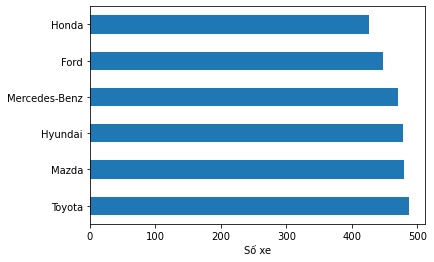

In [39]:
train_X_df['make'].value_counts().plot.barh()
plt.xlabel('Số xe')

### Biểu đồ bar chart thể hiện mỗi quan hệ giữa: loại nhiên liệu và số lượng xe

Text(0.5, 0, 'Số xe')

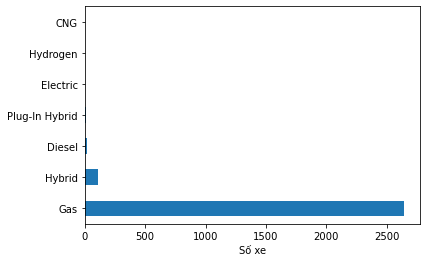

In [40]:
train_X_df['fuel type'].value_counts().plot.barh()
plt.xlabel('Số xe')

# Tiền xử lý (Tập huấn luyện)

Ta sẽ thêm và xóa một số cột như sau:

- Xóa cột "body style" vì cột này có quá nhiều giá trị khác nhau, nếu chuyển sang dạng số bằng phương pháp one-hot thì sẽ làm tăng số lượng cột lên rất nhiều
- Với cột "engine": giảm sự phức tạp của cột engine bằng cách chỉ lấy thông số lít(L) của động cơ, rồi chuyển nó sang dạng số
- Với cột "fuel type": giữ nguyên n_top_fuel_types có số lượng nhiều nhất (mặc định: n_top_fuel_types = 1) thì giữ nguyên giá trị, còn lại chuyển thành 'Others'
- Với cột "model": ta sẽ giữ lại n_top_models có chiếm số lượng nhiều nhất (mặc định: n_top_models = 10), còn lại chuyển thành 'Others'

In [41]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, n_top_fuels = 1, n_top_models = 10):
        self.n_top_fuels = n_top_fuels
        self.n_top_models = n_top_models
    def fit(self, X_df, y=None):
        self.fuel_counts_ = X_df['fuel type'].value_counts()
        fuel = list(self.fuel_counts_.index)
        self.top_fuels_ = fuel[:max(1, min(self.n_top_fuels, len(fuel)))]
        
        self.model_counts_ = X_df['model'].value_counts()
        model = list(self.model_counts_.index)
        self.top_models_ = model[:max(1, min(self.n_top_models, len(model)))]
        
        return self
    def transform(self, X_df, y=None):
        new_df = X_df.copy(deep = True)
        
        # xóa cột "body style"
        new_df = new_df.drop(columns = ['body style'], axis = 1)
        
        # chuyển cột "engine" sang dạng số
        new_df['engine'] = new_df['engine'].str.extract(r'(\d+.\d+L)')
        new_df['engine'] = new_df['engine'].str.replace('L', '').astype(float)
        
        # chuyển đổi giá trị cột "fuel type"
        fuel_col = new_df['fuel type']
        fuel_col[~fuel_col.isin(self.top_fuels_)] = 'Others'
        
        # chuyển đổi giá trị cột "model"
        model_col = new_df['model']
        model_col[~model_col.isin(self.top_models_)] = 'Others'
        
        return new_df

In [42]:
#test fit
col_adderdropper = ColAdderDropper(n_top_fuels = 1, n_top_models = 10)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.top_fuels_)
print()
print(col_adderdropper.top_models_)

['Gas']

['CX-5', 'Elantra', 'Civic', 'Corolla', 'Mazda3', 'C-Class', 'Camry', 'Sonata', 'Accord', 'F-150']


In [43]:
#Test transform
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
fewer_cols_train_X_df.head()

,make,model,year,mileage,engine,fuel type,number of owners
3835,Toyota,Corolla,2019,36937.0,1.8,Gas,2.0
968,Ford,Others,2014,54054.0,2.0,Others,2.0
1183,Ford,F-150,2016,75062.0,2.7,Gas,1.0
384,Honda,Others,2016,24070.0,1.5,Gas,3.0
2822,Mercedes-Benz,Others,2017,54635.0,2.0,Gas,1.0


Đến đây, các cột dạng số (numerical) gồm: "year", "mileage", "engine", "number of owners"; các cột không phải dạng số (categorical) và không có thứ tự gồm: "make", "model", "fuel type". Các bước tiền xử lý tiếp theo như sau:
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị median của cột, sau đó dùng StandardScaler để chuẩn hóa dữ liệu. **Tất cả** các cột dạng số trong tập huấn luyện, ta đều cần tính median, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Lưu ý với cột "number of owners", xử lý 1 bước trước khi xử lý giá trị thiếu, đó là: nếu giá trị trong cột "number of owners" = 0 thì ta chuyển nó = 1. Vì tiêu chí của ta là các xe đã qua sử dụng, mà đã qua sử dụng thì phải có >= 1 người chủ
- Với các cột không phải dạng số và không có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột. **Tất cả** các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot rồi StandardScaler để chuẩn hóa dữ liệu

In [44]:
class Sparse2DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X.todense()

In [45]:
class FixOwnerVal(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        new_X = X.copy(deep = True)
        new_X.loc[(new_X['number of owners'] == 0.0), 'number of owners'] = 1.0
        return new_X

In [46]:
nume_cols = ['year', 'mileage', 'engine', 'number of owners']
unorder_cate_cols = ['make', 'model', 'fuel type']

nume_transformer = Pipeline([
    ('impute1', SimpleImputer(missing_values = np.nan, strategy='median')),
    ('scale1', StandardScaler())
])

unorder_cate_transformer = Pipeline([
    ('impute2', SimpleImputer(missing_values = np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder()),
    ('todense', Sparse2DenseTransformer()),
    ('scale2', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('nume', nume_transformer, nume_cols),
    ('unorder_cate', unorder_cate_transformer, unorder_cate_cols),
])

preprocess_pipeline = Pipeline([
    ('add_drop', ColAdderDropper()),
    ('fix_owner', FixOwnerVal()),
    ('preprocess', preprocessor)
])

preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)
#preprocessed_train_X.shape

In [47]:
preprocess_pipeline

Pipeline(steps=[('add_drop', ColAdderDropper()), ('fix_owner', FixOwnerVal()),
                ('preprocess',
                 ColumnTransformer(transformers=[('nume',
                                                  Pipeline(steps=[('impute1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  ['year', 'mileage', 'engine',
                                                   'number of owners']),
                                                 ('unorder_cate',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder()),
                                                                  ('todense',
                                                                   Sparse2DenseTransformer()),
                                                                  ('scale2',
                                                                   StandardScaler())]),
                                                  ['make', 'model',
                                                   'fuel type'])]))])

# Tiền xử lý tập validation

Một khi đã có `preprocess_pipeline` với các giá trị (`n_top_fuels_`, `n_top_models_`, median, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức `transform` để tiền xử lý cho các véc-tơ input mới trong tập validation và tập kiểm tra. Dưới đây, ta sẽ làm như vậy để tiền xử lý cho `val_X_df` và lưu kết quả vào `preprocessed_val_X`.

In [48]:
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)
#preprocessed_val_X

# Tiền xử lý  + mô hình hóa

Công thức tính độ đo r^2

MLPRegressor có phương thức score để tính độ đo r^2 trên một tập dữ liệu

Dùng phương thức này trên tập huấn luyện thì OK, nhưng nếu dùng cho tập test (dữ liệu ngoài tập huấn luyện) thì sẽ ra kết quả sai, vì phương thức này sẽ dùng giá trị dự đoán của mô hình baseline là giá trị y trung bình trên tập test(ta muốn giá trị dự đoán của mô hình baseline vẫn là giá trị y trung bình trên tập huấn luyện)

In [49]:
# Tính độ đo r^2

# mean squared error
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()

# tính độ chính xác của các dự đoán
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)

Ta sẽ thử nghiệm với 2 mô hình:
- Neural Network (MLPRegressor)
- Linear Regression

## Thử nghiệm với mô hình Neural Network (MLPRegressor)
Ta sẽ thử nghiệm:

- Siêu tham số alpha (mức độ L2 regularization hay weight decay) của MLPRegressor với 5 giá trị khác nhau: 0.1, 1, 10, 100, 1000.
- Siêu tham số n_top_models của ColAdderDropper (ở bước tiền xử lý) với 3 giá trị khác nhau: 16,18,20

Tổng cộng ta sẽ thử nghiệm $5\times3 = 15$ mô hình khác nhau (thời gian training ~ 5 phút)

In [50]:
# Tạo full pipeline
nume_cols = ['year', 'mileage', 'engine', 'number of owners']
unorder_cate_cols = ['make', 'model', 'fuel type']


neural_net = MLPRegressor(hidden_layer_sizes=(20),
                           activation='relu', 
                           solver='adam', 
                           random_state=0, 
                           max_iter=2500)
full_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('neural_net', neural_net),
])

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]
n_top_models_s = [16, 18, 20]

best_val_err = float('inf')
best_alpha = None
best_n_top_models = None

baseline_preds = train_y_sr.mean()

for alpha in alphas:
    for n_top_models in n_top_models_s:
        full_pipeline.set_params(preprocessing__add_drop__n_top_models=n_top_models,
                                 neural_net__alpha=alpha)
        
        full_pipeline.fit(train_X_df, train_y_sr)
        train_error = (1 - full_pipeline.score(train_X_df, train_y_sr)) * 100
        train_errs.append(train_error)

        val_error = (1 - compute_rr(val_y_sr, full_pipeline.predict(val_X_df), baseline_preds))*100
        val_errs.append(val_error)

        if (val_error < best_val_err):
            best_val_err = val_error
            best_alpha = alpha
            best_n_top_models = n_top_models

In [51]:
#Test
full_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('add_drop', ColAdderDropper(n_top_models=20)),
                                 ('fix_owner', FixOwnerVal()),
                                 ('preprocess',
                                  ColumnTransformer(transformers=[('nume',
                                                                   Pipeline(steps=[('impute1',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scale1',
                                                                                    StandardScaler())]),
                                                                   ['year',
                                                                    'mileage',
                                                                    'engine',
                                                                    'number of '
                                                                    'owners']),
                                                                  ('unorder_cate',
                                                                   Pipeline(steps=[('impute2',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder()),
                                                                                   ('todense',
                                                                                    Sparse2DenseTransformer()),
                                                                                   ('scale2',
                                                                                    StandardScaler())]),
                                                                   ['make',
                                                                    'model',
                                                                    'fuel '
                                                                    'type'])]))])),
                ('neural_net',
                 MLPRegressor(alpha=1000, hidden_layer_sizes=20, max_iter=2500,
                              random_state=0))])

In [52]:
print('Best val error:', best_val_err)
print('Best alpha:', best_alpha)
print('Best n_top_models:', best_n_top_models)

Best val error: 17.318830936230324
Best alpha: 100
Best n_top_models: 18


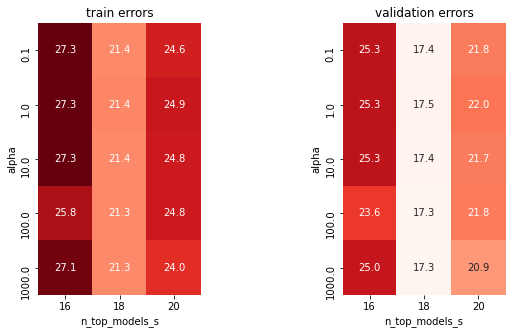

In [53]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=n_top_models_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=n_top_models_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('n_top_models_s'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('n_top_models_s'); plt.ylabel('alpha');

### Tạo mô hình tốt nhất dựa trên các tham số tìm được

Cuối cùng, ta sẽ huấn luyện lại full_pipeline trên X_df và y_sr (tập huấn luyện + tập validation) với best_alpha và best_n_top_models tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [54]:
full_pipeline.set_params(preprocessing__add_drop__n_top_models=best_n_top_models,
                         neural_net__alpha=best_alpha)
X_df = pd.concat([train_X_df,val_X_df])
y_sr = pd.concat([train_y_sr,val_y_sr])
full_pipeline.fit(X_df, y_sr)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('add_drop', ColAdderDropper(n_top_models=18)),
                                 ('fix_owner', FixOwnerVal()),
                                 ('preprocess',
                                  ColumnTransformer(transformers=[('nume',
                                                                   Pipeline(steps=[('impute1',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scale1',
                                                                                    StandardScaler())]),
                                                                   ['year',
                                                                    'mileage',
                                                                    'engine',
                                                                    'number of '
                                                                    'owners']),
                                                                  ('unorder_cate',
                                                                   Pipeline(steps=[('impute2',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder()),
                                                                                   ('todense',
                                                                                    Sparse2DenseTransformer()),
                                                                                   ('scale2',
                                                                                    StandardScaler())]),
                                                                   ['make',
                                                                    'model',
                                                                    'fuel '
                                                                    'type'])]))])),
                ('neural_net',
                 MLPRegressor(alpha=100, hidden_layer_sizes=20, max_iter=2500,
                              random_state=0))])

### Đánh giá mô hình tìm được

In [55]:
# Tính độ đo r^2 trên tập test
baseline_preds = y_sr.mean() 
(compute_rr(test_y_sr, full_pipeline.predict(test_X_df), baseline_preds))*100

85.28598446263757

Độ chính xác khoảng 85%

## Thử nghiệm mô hình LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
# Tạo full pipeline
nume_cols = ['year', 'mileage', 'engine', 'number of owners']
unorder_cate_cols = ['make', 'model', 'fuel type']
linear_reg_model = LinearRegression()
full_pipeline_1 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('linear_reg_model', linear_reg_model),
])
X_df = pd.concat([train_X_df,val_X_df])
y_sr = pd.concat([train_y_sr,val_y_sr])
full_pipeline_1.fit(X_df, y_sr)
full_pipeline_1.score(X_df, y_sr)*100

73.6606743344332

### Đánh giá mô hình

In [58]:
baseline_preds = y_sr.mean()
(compute_rr(test_y_sr, full_pipeline_1.predict(test_X_df), baseline_preds))*100

79.08150107175769

Độ chính xác khoảng 79%

## Nhận xét giữa 2 mô hình:

- Mô hình Neural Network (MLPRegressor):
   + Độ chính xác trên tập test khoảng 85%
   + Về mặt thời gian thì mô hình Neural Network train khá lâu, do ta phải tìm ra siêu tham số tốt nhất cho mô hình
   
   
- Mô hình Linear Regression:
   + Tuy đây là mô hình khá đơn giản nhưng độ chính xác cũng không quá tệ (khoảng 79%)
   + Về mặt thời gian thì rõ ràng nhanh hơn rất nhiều so với mô hình Neural Network

# Nhìn lại quá trình làm đồ án:

## Những khó khăn đã gặp

- Về quá trình thu thập dữ liệu: tốn khá nhiều thời gian, và cấu trúc của các chi tiết của mỗi ô tô cũng không giống nhau nên ban đầu, parse HTML xảy ra nhiều lỗi
- Ở bước tiền xử lý dữ liệu: do đây là lần đầu tiên áp dụng kỹ thuật pipeline nên đã xảy ra rất nhiều lỗi kỹ thuật khó khăn trong suốt quá trình làm preprocessing_pipeline

## Những kiến thức học được

- Học được quy trình Khoa học dữ liệu cơ bản
- Học được kỹ thuật dùng pipeline để đơn giản hóa code, và tránh các lỗi sai không mong muốn
- Học được kỹ thuật dùng thông tin tập train để biến đổi cho tập valid và tập test, chứ không phải tính trên từng tập, hay tính trên toàn tập rồi mới chia nhỏ như trước đây hay làm --> Nhận ra lỗi sai ngay đây
- Được áp dụng quy trình Khoa học dữ liệu để làm một bài toán thực tế, được trải nghiệm quá trình làm luôn
- Học được cách sử dụng git/github để quản lý project của nhóm, ngoài ra còn rèn luyện khả năng làm việc nhóm

## Nếu còn thời gian, sẽ làm những gì nữa?

Nếu có thời gian, nhóm sẽ thu thập và dự đoán đa dạng các hãng xe hơn nữa, ngoài ra sẽ tìm hiểu nhiều kỹ thuật để có thể tạo ra một mô hình dự đoán giá xe cũ tốt nhất có thể

# Tài liệu tham khảo:

* Bài tập 03
* Các slide bài giảng
* Các code demo
* Document về các hàm của sklearn